**Company Data**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [111]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [112]:
data=pd.read_csv('Company_Data.csv')

In [113]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [115]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [116]:
#Categorical feature
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
print('categorical features:',categorical_feature)

categorical features: ['ShelveLoc', 'Urban', 'US']


In [117]:
numerical_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Numerical features:',numerical_feature)

Numerical features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [118]:
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [119]:
data.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [120]:
data.US.unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Sales', ylabel='Count'>

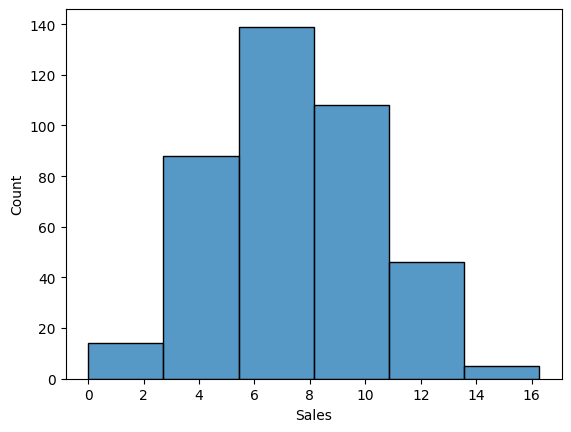

In [121]:
sns.histplot(x='Sales',bins=6,data=data)

In [122]:
data.Sales.max()

16.27

In [123]:
data.Sales.min()

0.0

In [124]:
data.Sales.max()/3

5.423333333333333

In [125]:
data1=data.copy()

data1['sub_category']=pd.cut(x=data1.Sales,bins=[0,5.5,11,17],labels=['Low','Medium','High'],right=False)
data1.drop(['Sales'],axis=1,inplace=True)

In [126]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


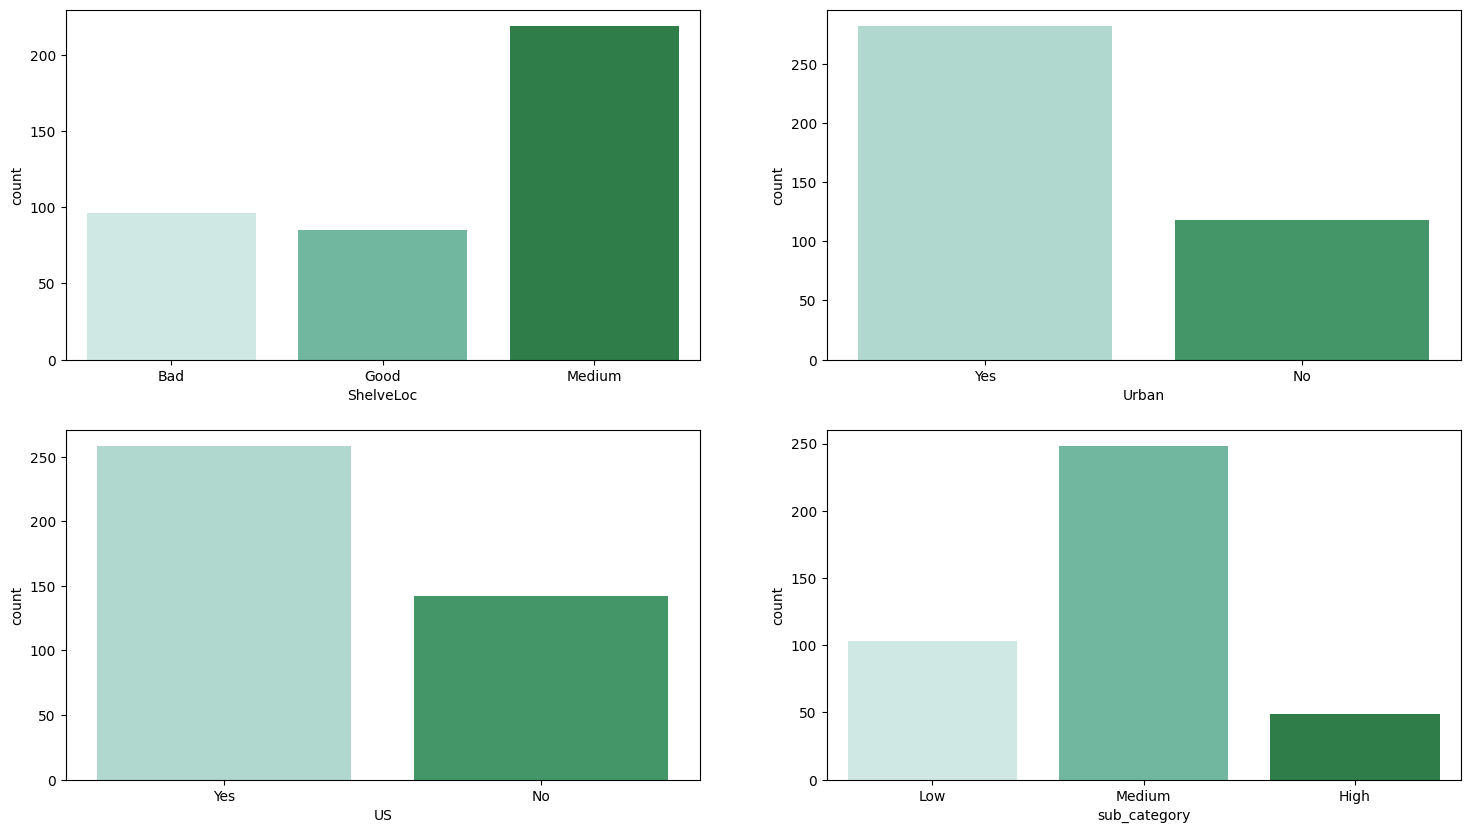

In [127]:
#Countplot for categorical variables
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(x='ShelveLoc',data=data1, palette='BuGn')
plt.subplot(2,2,2)
sns.countplot(x='Urban',data=data1, palette='BuGn')

plt.subplot(2,2,3)
sns.countplot(x='US', data=data1,palette='BuGn')
plt.subplot(2,2,4)
sns.countplot(x='sub_category',data=data1, palette='BuGn')

plt.show()

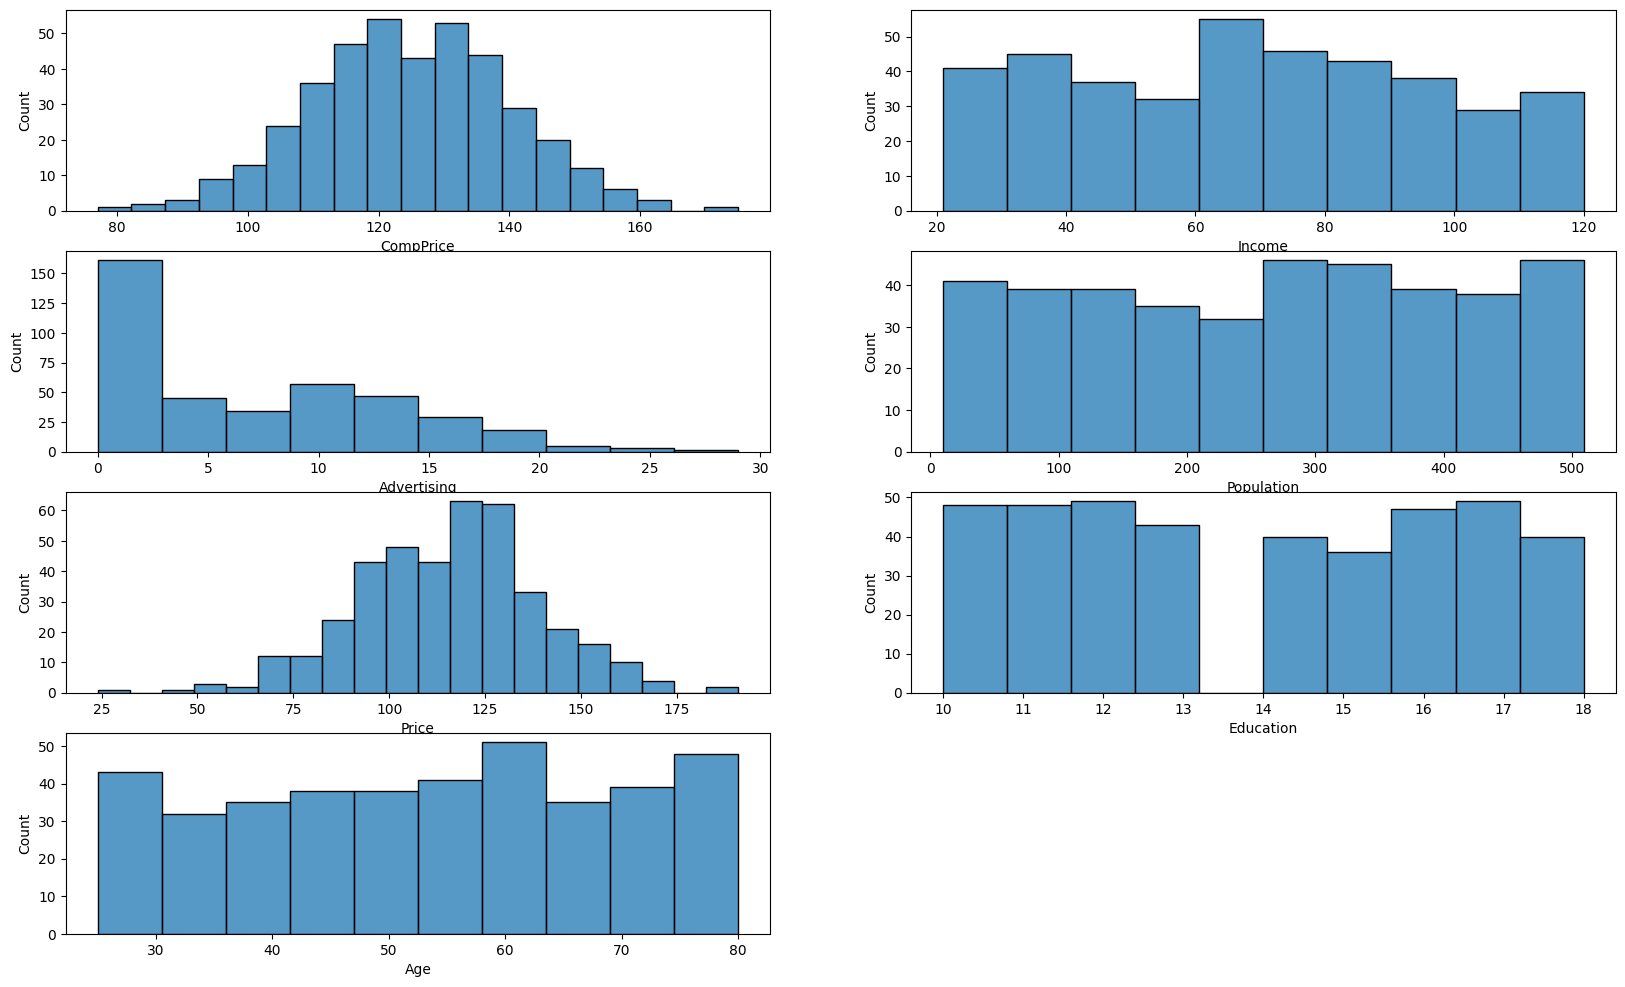

In [128]:
#Histogram for numerical variables
plt.figure(figsize=(20,12))

plt.subplot(4,2,1)
sns.histplot(data1['CompPrice']);

plt.subplot(4,2,2)
sns.histplot(data1['Income']);

plt.subplot(4,2,3)
sns.histplot(data1['Advertising']);

plt.subplot(4,2,4)
sns.histplot(data1['Population']);

plt.subplot(4,2,5)
sns.histplot(data1['Price']);

plt.subplot(4,2,6)
sns.histplot(data1['Education']);

plt.subplot(4,2,7)
sns.histplot(data1['Age']);

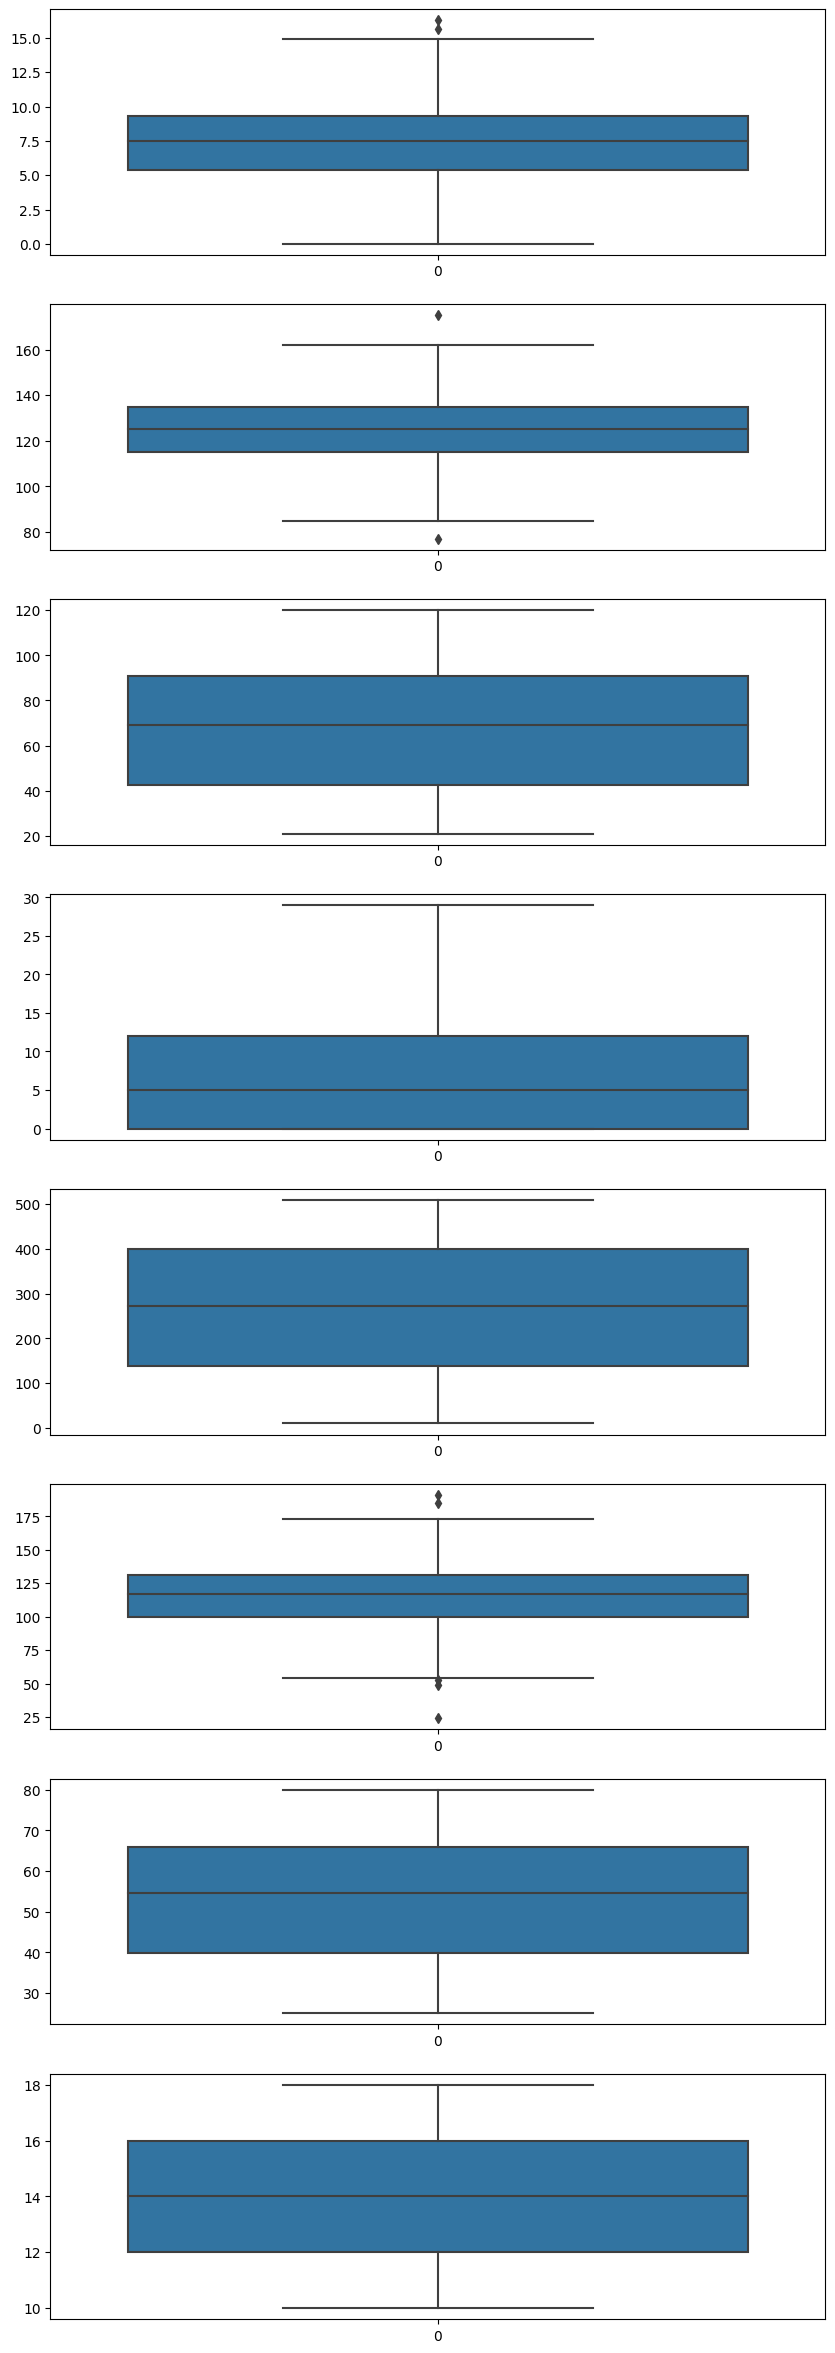

In [129]:
fig,axes=plt.subplots(len(numerical_feature),1,figsize=(10,30))

for i in range(0,len(numerical_feature)):
  sns.boxplot(data[numerical_feature[i]],ax=axes[i])

In [130]:
data2=data1.copy()
for feature in numerical_feature:
  Q1,Q3=np.percentile(data[feature],[25,75])
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[feature][(data[feature] < lower_bound) | (data[feature] >upper_bound)]

  data2=data2.drop(outliers.index[:],errors='ignore')

In [131]:
print(data.shape)
print(data2.shape)

(400, 11)
(392, 11)


In [132]:
x=data2.iloc[:,:-1]
y=data2.iloc[:,-1]

In [133]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [134]:
y.head()

0    Medium
1      High
2    Medium
3    Medium
4       Low
Name: sub_category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [135]:
x=pd.get_dummies(x)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [136]:
label=LabelEncoder()
y=label.fit_transform(y)

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 14)
(79, 14)
(313,)
(79,)


In [139]:
#Feature Selection
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [140]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

In [141]:
score=fit.scores_
features=fit.transform(x)

In [142]:
score_df = pd.DataFrame(list(zip(score, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


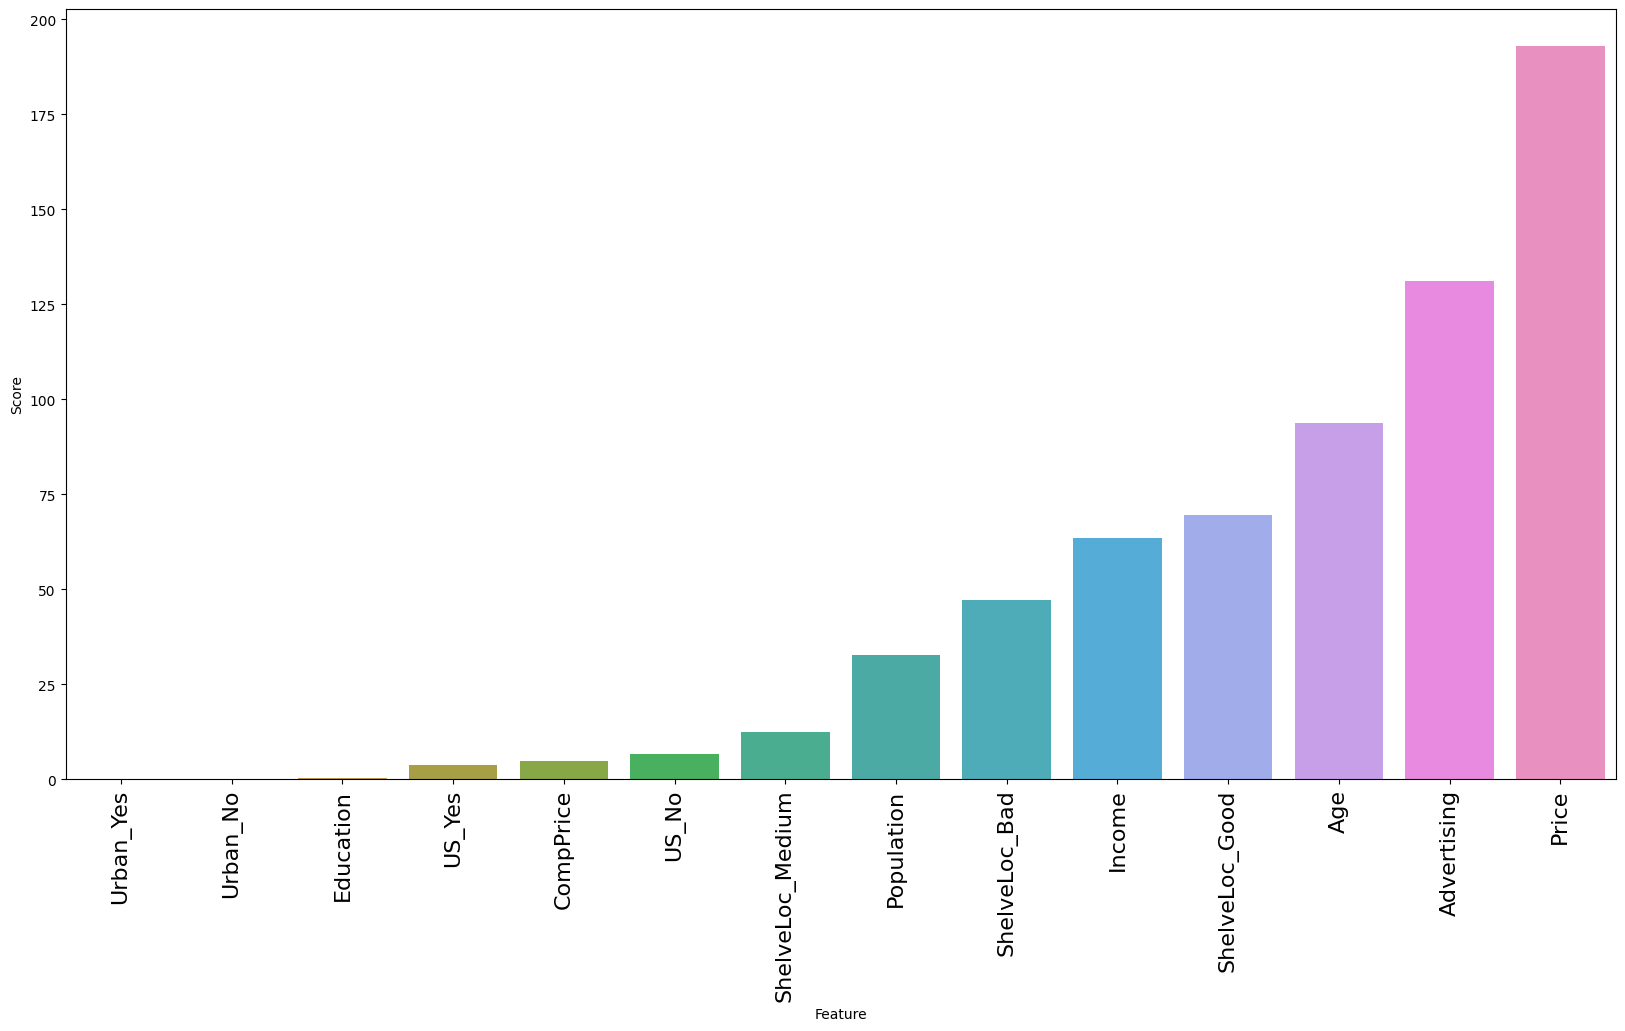

In [143]:
plt.figure(figsize=(20,10))
sns.barplot(x='Feature',y='Score',data=score_df,order=score_df.sort_values('Score').Feature)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [144]:
model_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [145]:
model_y=y

In [146]:
x_train, x_test,y_train,y_test = train_test_split(model_x, model_y, test_size=0.2,random_state=40)

**Building a model using entropy**

In [147]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [148]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2])

In [149]:
np.mean(y_pred==y_test)

0.620253164556962

In [150]:
pd.crosstab(y_pred,y_test)

col_0,0,1,2
row_0,,,
0,1,0,4
1,0,6,6
2,7,13,42


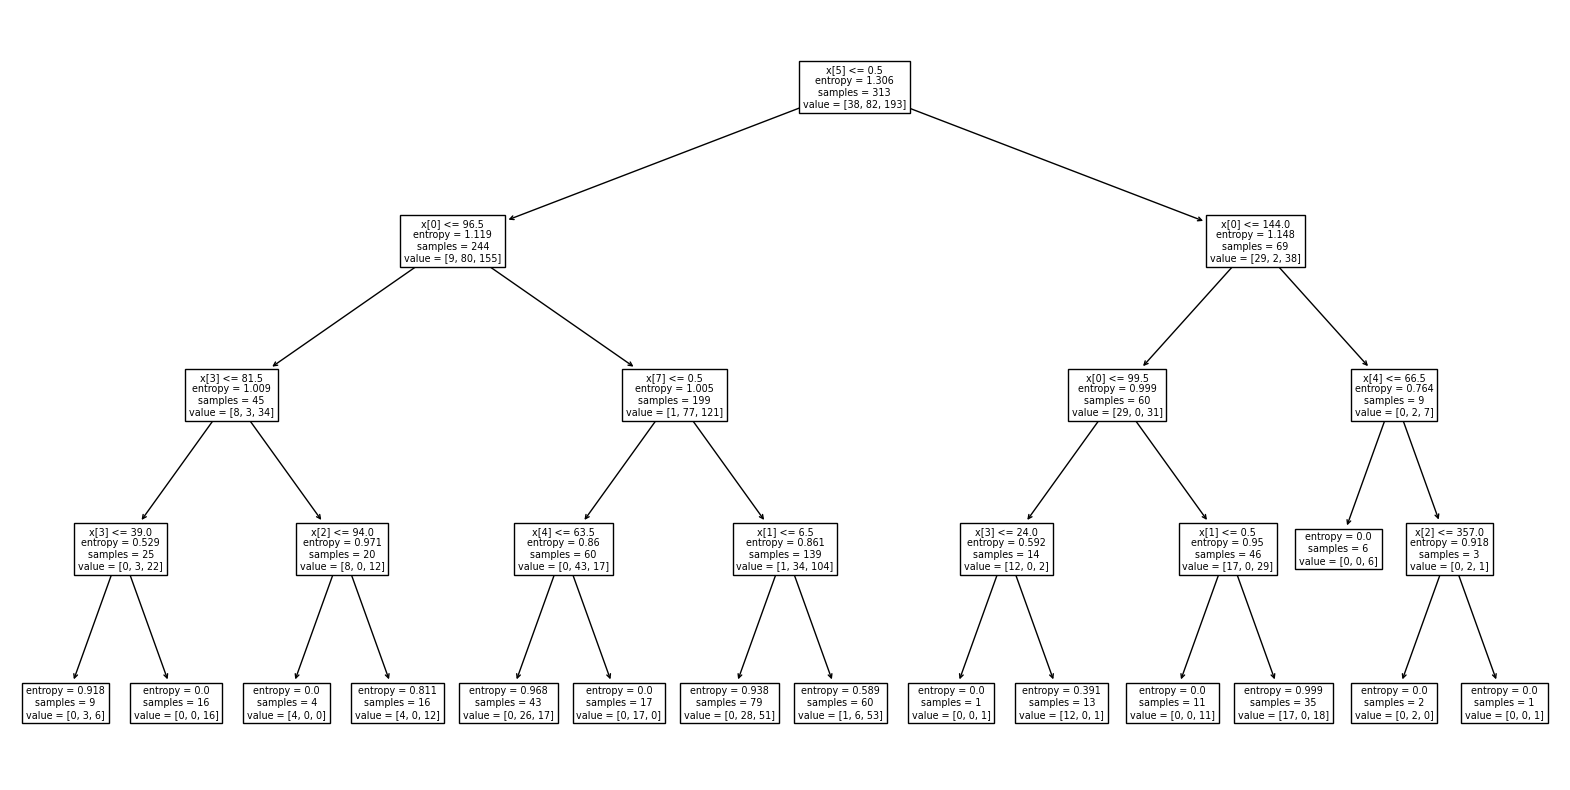

In [151]:
plt.figure(figsize=(20,10))
tree.plot_tree(model);

**Building the model using Gini Impurity**

In [152]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [153]:
y_pred=model.predict(x_test)

In [154]:
np.mean(y_pred==y_test)

0.6329113924050633

In [155]:
pd.crosstab(y_pred,y_test)

col_0,0,1,2
row_0,,,
0,2,0,4
1,0,7,7
2,6,12,41


In [156]:
confusion_matrix(y_pred,y_test)

array([[ 2,  0,  4],
       [ 0,  7,  7],
       [ 6, 12, 41]])

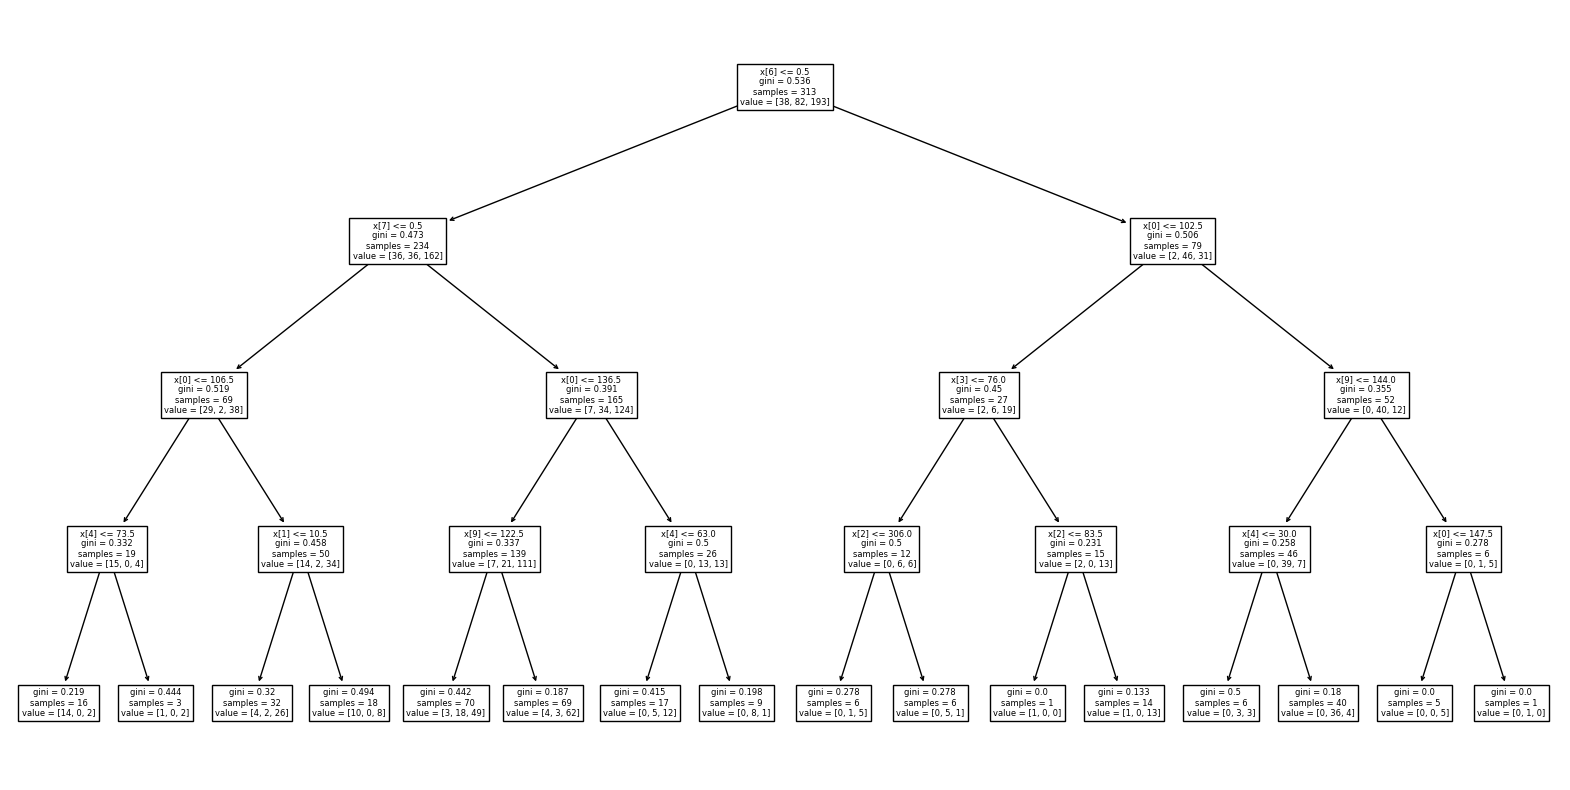

In [157]:
plt.figure(figsize=(20,10))
tree.plot_tree(model);

**GridSearch**

In [158]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [159]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [160]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_dict,cv=kfold)
grid.fit(model_x,model_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [161]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 3}
0.714102564102564


**Building model by best parameter**

In [162]:
new_model=grid.best_estimator_
new_model.fit(model_x,model_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=3)

In [163]:
results=cross_val_score(new_model,model_x,model_y,cv=kfold)
results.mean()*100

71.4102564102564

In [164]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.37      0.50      0.42        14
           2       0.79      0.69      0.74        59

    accuracy                           0.63        79
   macro avg       0.47      0.51      0.48        79
weighted avg       0.67      0.63      0.65        79



<Axes: >

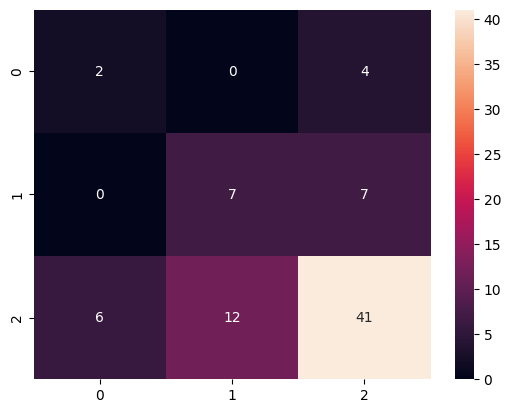

In [165]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)